In [1]:
import os
import sys

# Importante, serve a fare in modo che il jupyter notebook possa vedere ed importare i file di libreria che creiamo in questa cartella.
sys.path.insert(0, '..')

In [2]:
# Pandas
import pandas as pd

# Valutatore del modello
import functions.evaluation as evaluation

# Funzioni di caricamento dati
import functions.load as load

# Modello
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Carico il dataset
custom_df = pd.read_csv(r'../data/ridge_features_refined_data.csv')
custom_df.head()

,Lot_Area,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Exter_Qual,Bsmt_Qual,Bsmt_Exposure,BsmtFin_Type_1,Bsmt_Unf_SF,Total_Bsmt_SF,...,Central_Air_N,Central_Air_Y,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_Detchd,Garage_Type_No_Garage,Sale_Type_'WD ',Year_Sold,Mo_Sold,Sale_Price
0,-2.125439,7,5,0.292336,3,4,3,6,0.799868,0.339314,...,0,1,0,0,0,0,0,2006,3,0.015387
1,-2.123480,7,5,1.114337,3,4,4,6,0.847019,0.412956,...,0,1,0,0,0,0,1,2006,4,0.614236
2,-2.007543,8,5,0.628858,3,4,4,1,0.817310,0.356023,...,0,1,0,0,0,0,1,2006,5,0.631522
3,-2.173043,7,5,0.628858,3,4,3,6,0.098655,0.416660,...,0,1,0,0,0,0,1,2006,5,0.971735
4,-2.085350,7,5,0.334853,3,4,1,1,0.858377,0.420960,...,0,1,0,0,0,0,1,2006,5,0.178497


In [4]:
# Crea il modello di regressione basato su albero di decisione
model = DecisionTreeRegressor(random_state=42)

# Definisco la griglia di iperparametri da provare
param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000],
    'min_samples_leaf': [10,20,30,40,50,60,70,80,90,100],
}

In [5]:
# Crea l'Evaluator per valutare il modello
ev = evaluation.Evaluator(model = model, df = custom_df, ylabel = 'Sale_Price')

In [6]:
# Trova quali sono i parametri migliori per il modello
best_params, best_score = ev.grid_search_cv(params=param_grid)
load.saveBestParameterModel(type(ev.model).__name__,best_params)

best_params, best_score

({'criterion': 'absolute_error',
  'max_depth': 50,
  'min_samples_leaf': 10,
  'model_name': 'DecisionTreeRegressor'},
 0.8253113877314806)

In [7]:
# Inseriamole in delle variabili per poterle usare con più semplicità
criterion = best_params['criterion']
max_depth = best_params['max_depth']
min_samples_leaf = best_params['min_samples_leaf']

In [8]:
# Costruisci il regressore basato su Decison Tree con i migliori parametri trovati
DecisionTree = DecisionTreeRegressor(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
DecisionTree

DecisionTreeRegressor(criterion='absolute_error', max_depth=50,
                      min_samples_leaf=10, random_state=42)

In [9]:
# Creiamo l'Evaluator per valutare il modello con i parametri trovati
ev = evaluation.Evaluator(model = DecisionTree, df = custom_df, ylabel = 'Sale_Price')

# Fa splittare il dataset passato al valutatore (test_size = 0.20 di default)
ev.split_dataset()

In [10]:
# Valutiamo il modello secondo un Cross-Validation temporale
ev.temporal_cv(verbose=True)

[Split 0/10] - train_size: 0.093
r2: 0.66741  -  explained_variance: 0.68440  -  rmse: 0.52556  -  mae: 0.24262  -  max_error: 2.88508

[Split 1/10] - train_size: 0.183
r2: 0.79839  -  explained_variance: 0.80149  -  rmse: 0.45769  -  mae: 0.25662  -  max_error: 1.67808

[Split 2/10] - train_size: 0.274
r2: 0.75151  -  explained_variance: 0.75240  -  rmse: 0.53775  -  mae: 0.22925  -  max_error: 2.13223

[Split 3/10] - train_size: 0.365
r2: 0.85689  -  explained_variance: 0.85715  -  rmse: 0.34987  -  mae: 0.17314  -  max_error: 1.56787

[Split 4/10] - train_size: 0.456
r2: 0.83736  -  explained_variance: 0.84041  -  rmse: 0.35914  -  mae: 0.24062  -  max_error: 1.19677

[Split 5/10] - train_size: 0.546
r2: 0.81995  -  explained_variance: 0.82061  -  rmse: 0.42778  -  mae: 0.21594  -  max_error: 1.89448

[Split 6/10] - train_size: 0.637
r2: 0.76042  -  explained_variance: 0.76160  -  rmse: 0.54743  -  mae: 0.21621  -  max_error: 5.00452

[Split 7/10] - train_size: 0.728
r2: 0.80898  - 

r2:                  0.79745
explained_variance:  0.80045
rmse:                0.44002
mae:                 0.22119
max_error:           2.20613

In [11]:
# Valutiamo il modello sul test set
ev.evaluate()

r2:                  0.79876
explained_variance:  0.80049
rmse:                0.45337
mae:                 0.22660
max_error:           4.40525

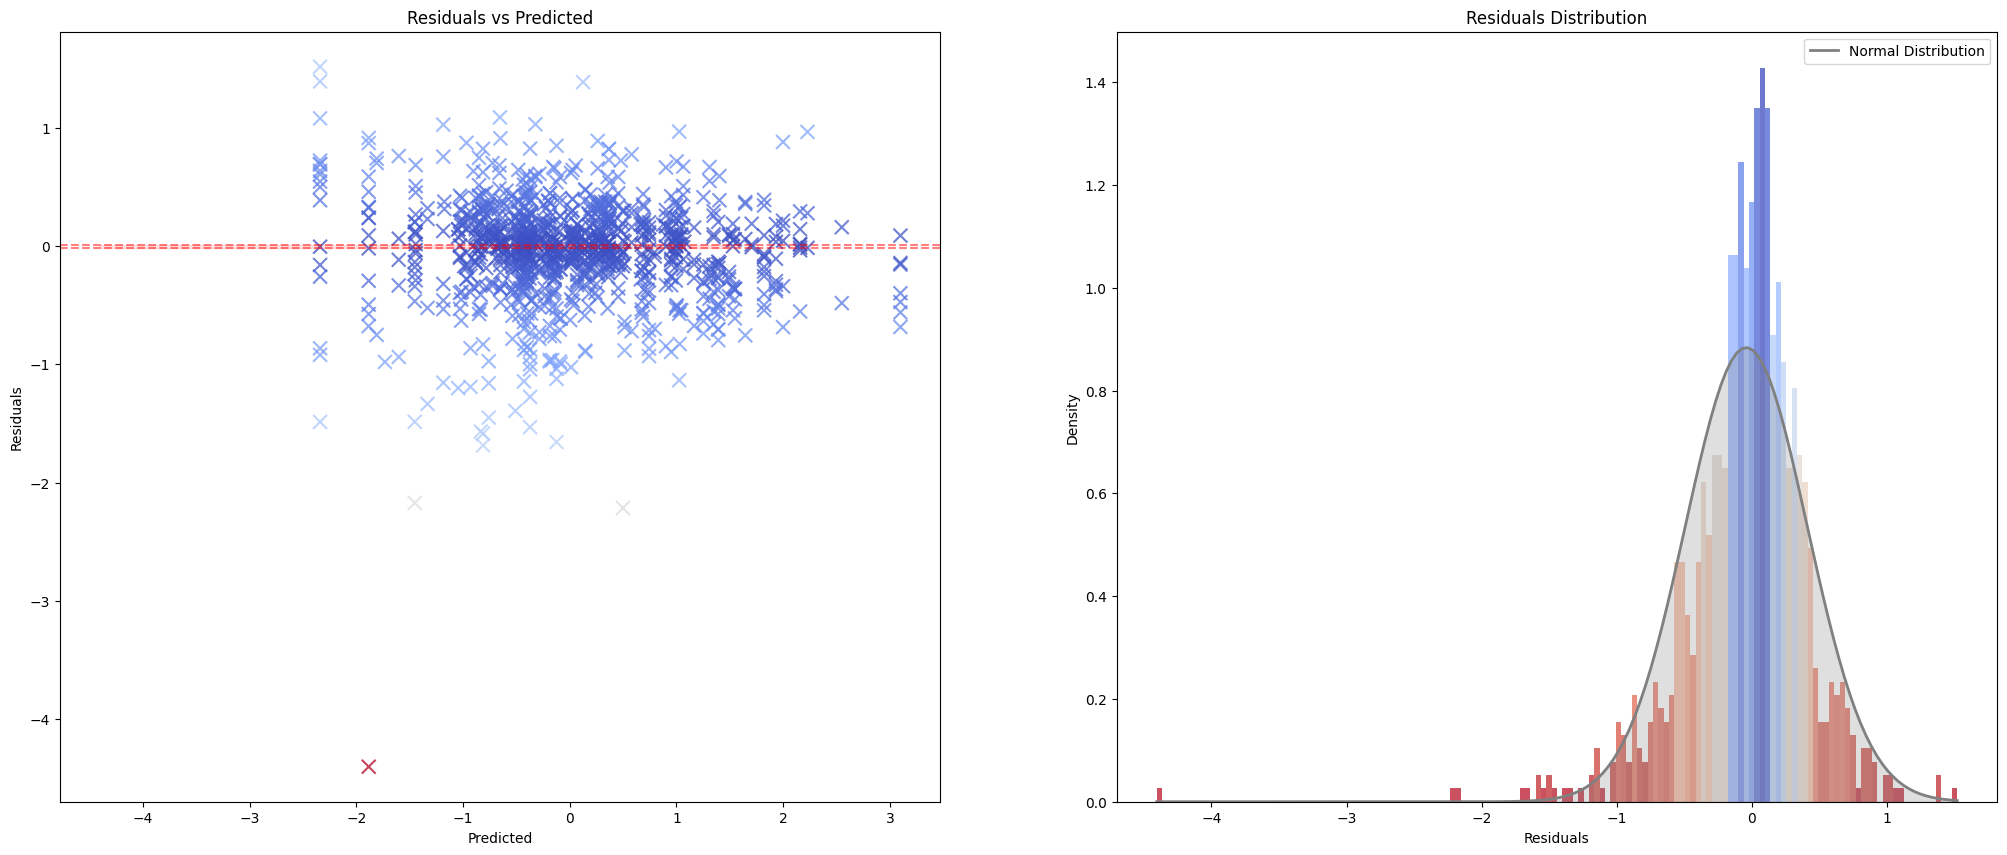

In [12]:
#Osseviamo i residui
ev.plot_residuals()